In [43]:
# Standard libraries
import os
import json
from pathlib import Path
from collections import defaultdict, Counter

# Data manipulation
import pandas as pd
import numpy as np
from pprint import pprint

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Progress bars
from tqdm import tqdm

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Paths
DATA_DIR = Path('challenge_downloads')
TRAIN_CSV = DATA_DIR / 'train.csv'
TEST_CSV = DATA_DIR / 'test.csv'
TRAIN_TRACKING = DATA_DIR / 'train_tracking'
TRAIN_ANNOTATION = DATA_DIR / 'train_annotation'
TEST_TRACKING = DATA_DIR / 'test_tracking'

In [44]:
# explore meta data

train_meta = pd.read_csv(TRAIN_CSV)
test_meta = pd.read_csv(TEST_CSV)

In [45]:
train_meta.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lab_id              8789 non-null   object 
 1   video_id            8789 non-null   int64  
 2   mouse1_strain       8789 non-null   object 
 3   mouse1_color        8789 non-null   object 
 4   mouse1_sex          8779 non-null   object 
 5   mouse1_id           816 non-null    float64
 6   mouse1_age          8140 non-null   object 
 7   mouse1_condition    8229 non-null   object 
 8   mouse2_strain       8789 non-null   object 
 9   mouse2_color        8789 non-null   object 
 10  mouse2_sex          8742 non-null   object 
 11  mouse2_id           108 non-null    float64
 12  mouse2_age          8140 non-null   object 
 13  mouse2_condition    7991 non-null   object 
 14  mouse3_strain       7943 non-null   object 
 15  mouse3_color        7943 non-null   object 
 16  mouse3

In [47]:
train_meta

,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,mouse2_sex,mouse2_id,mouse2_age,mouse2_condition,mouse3_strain,mouse3_color,mouse3_sex,mouse3_id,mouse3_age,mouse3_condition,mouse4_strain,mouse4_color,mouse4_sex,mouse4_id,mouse4_age,mouse4_condition,frames_per_second,video_duration_sec,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
0,AdaptableSnail,44566106,CD-1 (ICR),white,male,10.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,24.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,38.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,51.0,8-12 weeks,wireless device,30.00,615.6,16.0,1228,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
1,AdaptableSnail,143861384,CD-1 (ICR),white,male,3.0,8-12 weeks,NaN,CD-1 (ICR),white,male,17.0,8-12 weeks,NaN,CD-1 (ICR),white,male,31.0,8-12 weeks,NaN,CD-1 (ICR),white,male,44.0,8-12 weeks,NaN,25.00,3599.0,9.7,968,608,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
2,AdaptableSnail,209576908,CD-1 (ICR),white,male,7.0,8-12 weeks,NaN,CD-1 (ICR),white,male,21.0,8-12 weeks,NaN,CD-1 (ICR),white,male,35.0,8-12 weeks,NaN,CD-1 (ICR),white,male,48.0,8-12 weeks,NaN,30.00,615.2,16.0,1266,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
3,AdaptableSnail,278643799,CD-1 (ICR),white,male,11.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,25.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,39.0,8-12 weeks,wireless device,NaN,NaN,NaN,NaN,NaN,NaN,30.00,619.7,16.0,1224,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
4,AdaptableSnail,351967631,CD-1 (ICR),white,male,14.0,8-12 weeks,NaN,CD-1 (ICR),white,male,28.0,8-12 weeks,NaN,CD-1 (ICR),white,male,42.0,8-12 weeks,NaN,NaN,NaN,NaN,NaN,8-12 weeks,NaN,30.00,602.6,16.0,1204,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,UppityFerret,1610683375,C57Bl/6N,black,male,8.0,8 weeks,csds,CD1,white,male,NaN,4-6 weeks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,600.1,13.0,664,572,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,reciprocalsniff"", ""mouse1,mous...",DeepLabCut
8785,UppityFerret,1725214092,C57Bl/6N,black,male,27.0,8 weeks,NaN,CD1,white,male,NaN,4-6 weeks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.99,600.2,12.8,608,576,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,intromit"", ""mouse1,mouse2,moun...",DeepLabCut
8786,UppityFerret,1960237444,C57Bl/6N,black,male,14.0,8 weeks,csds,CD1,white,male,NaN,4-6 weeks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.99,600.2,12.5,592,576,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,reciprocalsniff"", ""mouse1,mous...",DeepLabCut
8787,UppityFerret,2045808129,C57Bl/6N,black,male,12.0,8 weeks,csds,CD1,white,male,NaN,4-6 weeks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.99,600.2,12.5,624,572,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,reciprocalsniff"", ""mouse1,mous...",DeepLabCut


In [49]:
test_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lab_id              1 non-null      object 
 1   video_id            1 non-null      int64  
 2   mouse1_strain       1 non-null      object 
 3   mouse1_color        1 non-null      object 
 4   mouse1_sex          1 non-null      object 
 5   mouse1_id           1 non-null      float64
 6   mouse1_age          1 non-null      object 
 7   mouse1_condition    1 non-null      object 
 8   mouse2_strain       1 non-null      object 
 9   mouse2_color        1 non-null      object 
 10  mouse2_sex          1 non-null      object 
 11  mouse2_id           1 non-null      float64
 12  mouse2_age          1 non-null      object 
 13  mouse2_condition    1 non-null      object 
 14  mouse3_strain       1 non-null      object 
 15  mouse3_color        1 non-null      object 
 16  mouse3_sex  

In [50]:
test_meta

,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,mouse2_sex,mouse2_id,mouse2_age,mouse2_condition,mouse3_strain,mouse3_color,mouse3_sex,mouse3_id,mouse3_age,mouse3_condition,mouse4_strain,mouse4_color,mouse4_sex,mouse4_id,mouse4_age,mouse4_condition,frames_per_second,video_duration_sec,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
0,AdaptableSnail,438887472,CD-1 (ICR),white,male,13.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,27.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,41.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,53.0,8-12 weeks,wireless device,30.0,614.7,16.0,1214,1090,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut


In [53]:
# explore tracking and annotation example

adapt_snail_example_annotation = pd.read_parquet(TRAIN_ANNOTATION / 'AdaptableSnail' /  '44566106.parquet')
adapt_snail_example_tracking = pd.read_parquet(TRAIN_TRACKING / 'AdaptableSnail' /  '44566106.parquet')


In [56]:
adapt_snail_example_tracking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087658 entries, 0 to 1087657
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   video_frame  1087658 non-null  int16  
 1   mouse_id     1087658 non-null  int8   
 2   bodypart     1087658 non-null  object 
 3   x            1087658 non-null  float32
 4   y            1087658 non-null  float32
dtypes: float32(2), int16(1), int8(1), object(1)
memory usage: 19.7+ MB


In [57]:
adapt_snail_example_tracking

,video_frame,mouse_id,bodypart,x,y
0,0,1,body_center,1161.543945,523.112976
1,0,1,ear_right,1146.305054,587.619995
2,0,1,headpiece_bottomfrontright,1163.192017,588.580017
3,0,1,headpiece_topbackright,1192.211060,558.434998
4,0,1,headpiece_topfrontleft,1191.343994,620.625977
...,...,...,...,...,...
1087653,18450,4,lateral_left,250.681000,646.434021
1087654,18450,4,lateral_right,297.471985,679.210022
1087655,18450,4,tail_base,265.600006,688.062012
1087656,18450,4,tail_midpoint,263.371002,748.155029


In [73]:
pprint(adapt_snail_example_tracking.mouse_id.unique().tolist())

[1, 2, 3, 4]


In [72]:
pprint(adapt_snail_example_tracking.bodypart.unique().tolist())

['body_center',
 'ear_right',
 'headpiece_bottomfrontright',
 'headpiece_topbackright',
 'headpiece_topfrontleft',
 'headpiece_topfrontright',
 'lateral_left',
 'lateral_right',
 'tail_base',
 'tail_midpoint',
 'tail_tip',
 'headpiece_bottombackleft',
 'headpiece_bottombackright',
 'headpiece_bottomfrontleft',
 'headpiece_topbackleft',
 'nose',
 'ear_left',
 'neck']


In [54]:
adapt_snail_example_annotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   agent_id     342 non-null    int8  
 1   target_id    342 non-null    int8  
 2   action       342 non-null    object
 3   start_frame  342 non-null    int16 
 4   stop_frame   342 non-null    int16 
dtypes: int16(2), int8(2), object(1)
memory usage: 4.8+ KB


In [55]:
adapt_snail_example_annotation

,agent_id,target_id,action,start_frame,stop_frame
0,2,2,rear,4,139
1,4,2,avoid,13,52
2,4,4,rear,121,172
3,3,3,rear,156,213
4,4,4,rear,208,261
...,...,...,...,...,...
337,3,1,approach,18172,18184
338,2,2,rear,18195,18287
339,1,4,approach,18266,18305
340,3,3,rear,18297,18363


In [76]:
# Calculate mouse orientation/direction for each frame
# We'll compute the angle from tail -> nose vector

def calculate_mouse_direction(tracking_df):
    """
    Calculate the direction each mouse is facing based on body parts.
    Returns angle in degrees (0-360) where 0 is pointing right, 90 is up, etc.
    """
    
    # Pivot to get each body part as a column
    df_wide = tracking_df.pivot_table(
        index=['video_frame', 'mouse_id'],
        columns='bodypart',
        values=['x', 'y']
    ).reset_index()
    
    # Flatten column names
    df_wide.columns = ['_'.join(col).strip('_') if col[0] not in ['video_frame', 'mouse_id'] else col[0] for col in df_wide.columns.values]
    
    # Calculate direction vector from tail_base to nose (if both exist)
    if 'x_tail_base' in df_wide.columns and 'x_nose' in df_wide.columns:
        df_wide['direction_x'] = df_wide['x_nose'] - df_wide['x_tail_base']
        df_wide['direction_y'] = df_wide['y_nose'] - df_wide['y_tail_base']
        
        # Calculate angle in degrees (atan2 gives angle from x-axis)
        df_wide['direction_angle'] = np.degrees(
            np.arctan2(df_wide['direction_y'], df_wide['direction_x'])
        )
        
        # Normalize to 0-360
        df_wide['direction_angle'] = (df_wide['direction_angle'] + 360) % 360
        
    return df_wide


In [77]:
directions_df = calculate_mouse_direction(adapt_snail_example_tracking)
directions_df

,video_frame,mouse_id,x_body_center,x_ear_left,x_ear_right,x_headpiece_bottombackleft,x_headpiece_bottombackright,x_headpiece_bottomfrontleft,x_headpiece_bottomfrontright,x_headpiece_topbackleft,x_headpiece_topbackright,x_headpiece_topfrontleft,x_headpiece_topfrontright,x_lateral_left,x_lateral_right,x_neck,x_nose,x_tail_base,x_tail_midpoint,x_tail_tip,y_body_center,y_ear_left,y_ear_right,y_headpiece_bottombackleft,y_headpiece_bottombackright,y_headpiece_bottomfrontleft,y_headpiece_bottomfrontright,y_headpiece_topbackleft,y_headpiece_topbackright,y_headpiece_topfrontleft,y_headpiece_topfrontright,y_lateral_left,y_lateral_right,y_neck,y_nose,y_tail_base,y_tail_midpoint,y_tail_tip,direction_x,direction_y,direction_angle
0,0,1,1161.543945,NaN,1146.305054,NaN,NaN,NaN,1163.192017,NaN,1192.211060,1191.343994,1164.946045,1182.458984,1131.587036,NaN,NaN,1142.069946,1110.595947,1090.537964,523.112976,NaN,587.619995,NaN,NaN,NaN,588.580017,NaN,558.434998,620.625977,599.406982,499.796997,526.543030,NaN,NaN,478.727997,413.751007,358.108002,NaN,NaN,NaN
1,0,2,334.800995,NaN,310.395996,381.666992,364.747986,362.169006,338.841003,394.040985,366.553986,375.097992,345.972992,366.199005,302.561005,NaN,342.182007,345.710999,357.278015,NaN,456.221985,NaN,506.397003,483.617004,468.149994,526.309998,504.449005,481.984985,464.243988,521.786011,494.019012,454.803986,456.584991,NaN,547.919983,422.778992,397.666992,NaN,-3.528992,125.140991,91.615326
2,0,3,1152.323975,1202.071045,1146.833984,1212.435059,1182.329956,1195.391968,1155.413940,1210.114990,1187.936035,1182.692017,1158.305054,1166.659058,1127.937012,NaN,NaN,1113.181030,1069.093018,983.145020,319.164001,347.345001,363.234009,365.003998,358.496002,363.798004,384.213989,385.561005,366.260010,412.847992,395.454987,298.108002,336.322998,NaN,NaN,296.644012,254.542999,209.229996,NaN,NaN,NaN
3,0,4,369.373993,NaN,355.019012,NaN,NaN,395.816986,377.821991,428.032013,404.903992,391.867004,367.803986,399.859985,338.476013,NaN,388.445007,352.371002,298.622009,462.279999,311.376007,NaN,367.675995,NaN,NaN,340.549011,365.240997,362.932007,331.540985,393.134003,367.097992,303.920990,313.386993,NaN,408.816986,272.580994,257.384003,337.100006,36.074005,136.235992,75.168976
4,1,1,1162.682983,NaN,1139.979980,NaN,NaN,NaN,1162.135986,NaN,1192.206055,1191.656982,1164.035034,1184.682983,1129.592041,NaN,1177.928955,1141.159058,1113.213989,1085.227051,538.546021,NaN,599.685974,NaN,NaN,NaN,618.617981,NaN,571.981018,631.976990,612.393982,508.958008,536.718018,NaN,636.612976,486.244995,420.377014,359.550995,36.769897,150.367981,76.258972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73775,18449,4,274.894012,269.326996,304.476990,NaN,252.278000,NaN,NaN,237.453995,251.102005,282.259003,302.015991,252.065002,299.364990,NaN,NaN,273.778992,264.696014,531.882019,648.221008,620.901001,669.562988,NaN,620.059998,NaN,NaN,587.531982,604.171997,563.848999,659.838989,637.289001,677.367004,NaN,NaN,685.666992,747.356018,489.996002,NaN,NaN,NaN
73776,18450,1,383.847992,331.944000,344.325012,307.075989,345.516998,NaN,311.819000,305.839996,334.582001,291.582001,302.166992,394.286987,396.829987,NaN,299.114990,440.656006,471.730011,NaN,613.682983,619.992981,582.299011,659.627991,638.502014,NaN,596.916016,657.815002,641.609985,620.867981,595.145020,645.581970,588.771973,NaN,580.642029,600.760010,529.966980,NaN,-141.541016,-20.117981,188.089569
73777,18450,2,876.814026,NaN,815.935974,NaN,873.736023,826.468994,824.044006,880.101013,873.416016,833.281006,828.624023,903.789978,860.429016,819.973999,806.330017,910.809998,965.038025,1014.862000,859.643982,NaN,873.992981,NaN,888.875000,924.166016,892.156982,917.068970,891.419006,925.955017,891.510986,880.241028,832.825012,908.018982,925.541016,830.346008,782.557983,729.846008,-104.479980,95.195007,137.662354
73778,18450,3,699.848999,NaN,640.382019,NaN,NaN,649.797974,652.075989,704.762

In [ ]:
print(directions_df[['video_frame', 'mouse_id', 'x_nose', 'y_nose', 'x_tail_base', 'y_tail_base', 'direction_angle']].head(10))

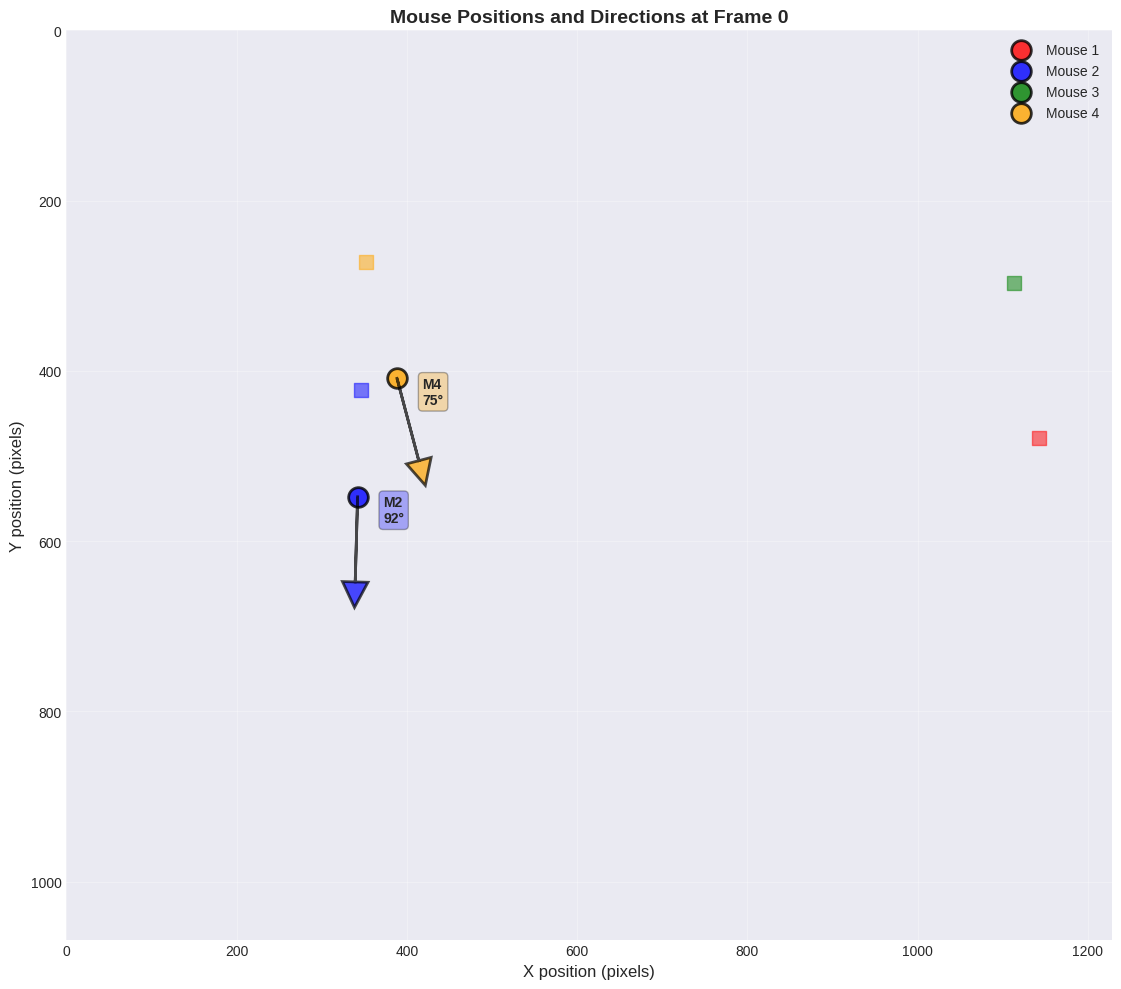

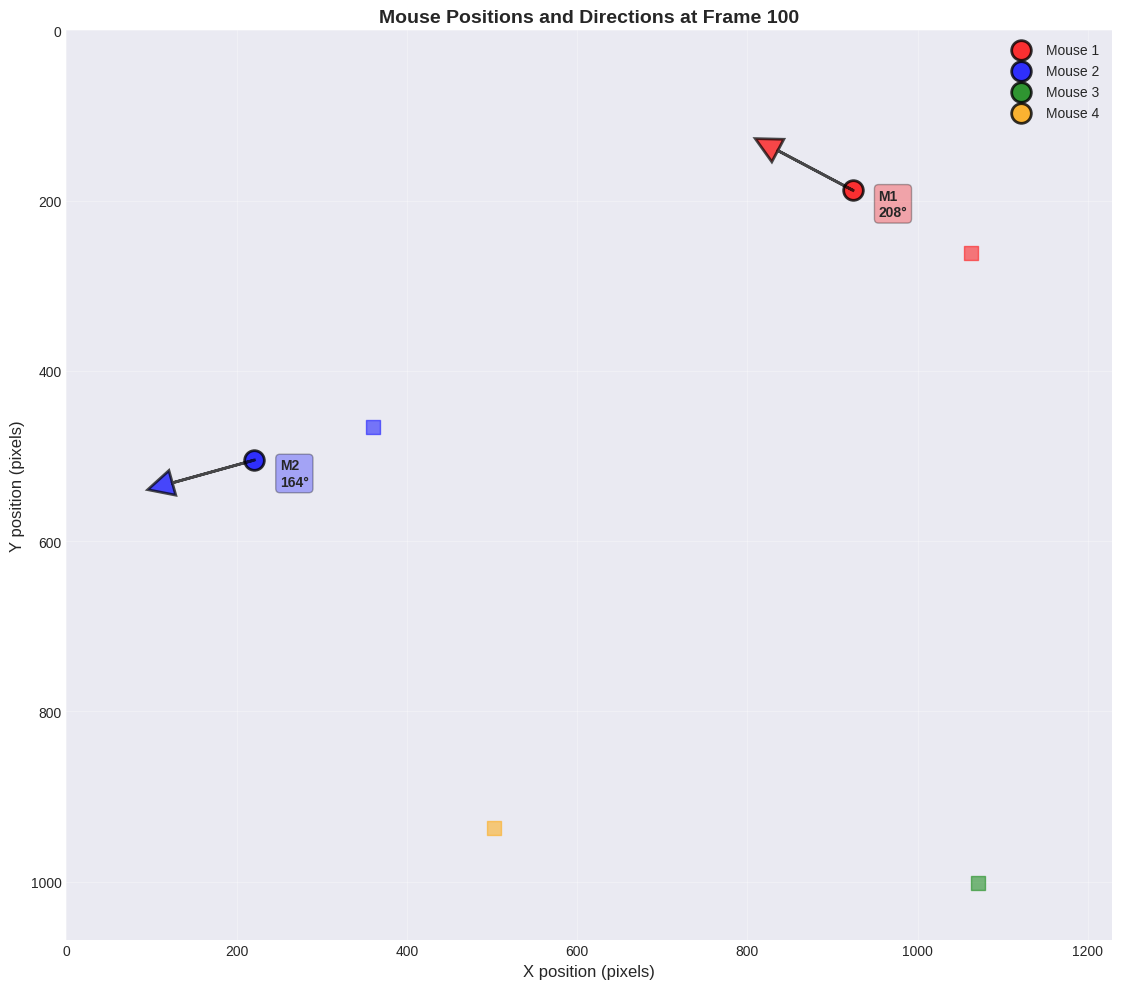

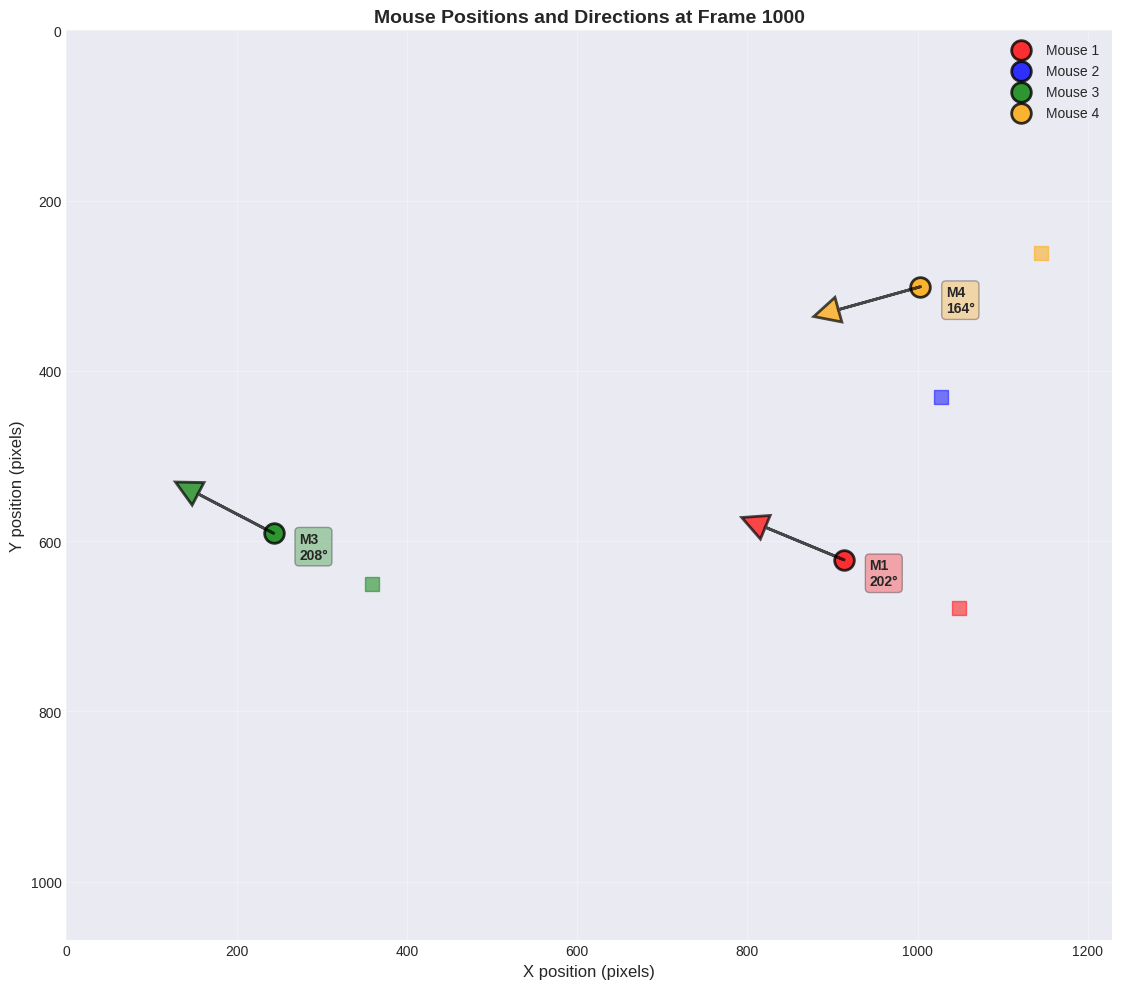

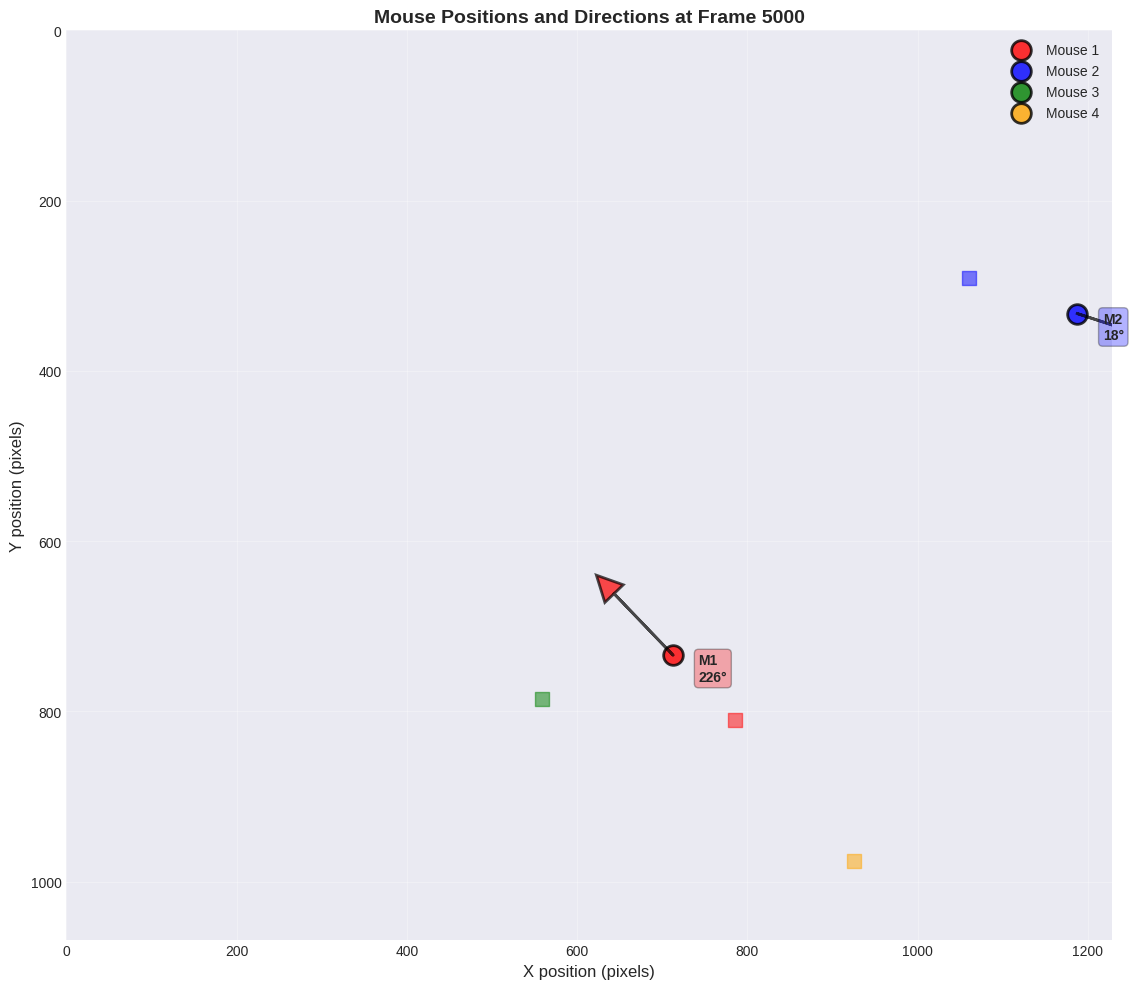

In [75]:
# Visualize mice positions and directions at a specific frame

def plot_mouse_positions_and_directions(directions_df, frame_num, arena_width=1228, arena_height=1068):
    """
    Plot all mice at a specific frame with arrows showing their direction.
    """
    frame_data = directions_df[directions_df['video_frame'] == frame_num]
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    
    colors = ['red', 'blue', 'green', 'orange']
    
    for idx, row in frame_data.iterrows():
        mouse_id = int(row['mouse_id'])
        color = colors[mouse_id - 1]
        
        # Plot nose position
        ax.scatter(row['x_nose'], row['y_nose'], 
                  s=200, c=color, marker='o', 
                  label=f'Mouse {mouse_id}', alpha=0.8, edgecolors='black', linewidths=2)
        
        # Plot tail position  
        ax.scatter(row['x_tail_base'], row['y_tail_base'], 
                  s=100, c=color, marker='s', alpha=0.5)
        
        # Draw direction arrow
        arrow_length = 100
        dx = arrow_length * np.cos(np.radians(row['direction_angle']))
        dy = arrow_length * np.sin(np.radians(row['direction_angle']))
        
        ax.arrow(row['x_nose'], row['y_nose'], dx, dy,
                head_width=30, head_length=30, fc=color, ec='black', linewidth=2, alpha=0.7)
        
        # Add mouse ID label
        ax.text(row['x_nose'] + 30, row['y_nose'] + 30, 
               f'M{mouse_id}\n{row["direction_angle"]:.0f}°', 
               fontsize=10, fontweight='bold', 
               bbox=dict(boxstyle='round', facecolor=color, alpha=0.3))
    
    ax.set_xlim(0, arena_width)
    ax.set_ylim(0, arena_height)
    ax.set_xlabel('X position (pixels)', fontsize=12)
    ax.set_ylabel('Y position (pixels)', fontsize=12)
    ax.set_title(f'Mouse Positions and Directions at Frame {frame_num}', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    
    # Invert y-axis (images have origin at top-left)
    ax.invert_yaxis()
    
    plt.tight_layout()
    return fig

# Plot a few different frames
frames_to_plot = [0, 100, 1000, 5000]

for frame in frames_to_plot:
    if frame <= directions_df['video_frame'].max():
        fig = plot_mouse_positions_and_directions(directions_df, frame)
        plt.show()
        print(f"\n{'='*80}\n")

In [82]:
tuple_example = ("test1", "balsfnsdkf")
"_".join(tuple_example)

'test1_balsfnsdkf'